## Лабораторная работа №3

## Обработка бинарных изображений. Морфология.

Вариант №10

Выполнил: Новицкий Никита

Группа: 6132-010402D


1. Создать средствами OpenCV бинарное изображение с простым рисунком.
  *   Русунок из простых фигур: квадрат, круг и т.д.
2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение
3. Написать функции реализации эрозии и дилатации 

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы 

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.
5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
  *   Таблица логического фильтра в лекции слайд 17.

7. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными контурами.

8. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта. 
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
№ варианта | Вероятность p | Вид структурного элемента
--- | :---: | :---: 
10 | 0,25 | крест 5×5

In [1]:
from itertools import product
from warnings import filterwarnings

import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.pyplot import *
from tqdm.notebook import tqdm

filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 7)

In [2]:
print(f'Версия matplotlib: {matplotlib.__version__}')
print(f'Версия numpy: {np.__version__}')
print(f'Версия opencv: {cv2.__version__}')

Версия matplotlib: 3.5.1
Версия numpy: 1.21.5
Версия opencv: 4.5.5


In [3]:
# Вероятность p
PROBABILITY = 0.25

# Структурный элемент - крест 5x5
MORPH_CROSS_5x5 = np.array([
    [False, False, True, False, False],
    [False, False, True, False, False],
    [True,  True,  True, True,  True],
    [False, False, True, False, False],
    [False, False, True, False, False]
])

# Задание 1.

Создать средствами OpenCV бинарное изображение с простым рисунком.
  *   Русунок из простых фигур: квадрат, круг и т.д.

In [4]:
def show_image(image):
    """Функция для вывода изображения."""
    plt.axis('off')
    plt.imshow(image, cmap='gray')

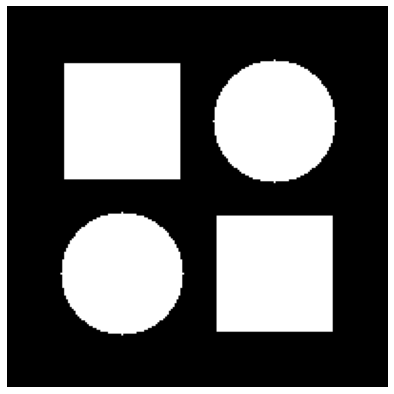

In [5]:
img = np.zeros([200, 200], np.uint8)

# Квадраты
cv2.rectangle(img, (90, 90), (30, 30), (255, 255, 255), -1)
cv2.rectangle(img, (110, 110), (170, 170), (255, 255, 255), -1)

# Круги
cv2.circle(img, (140, 60), 32, (255, 255, 255), -1)
cv2.circle(img, (60, 140), 32, (255, 255, 255), -1)

show_image(img)

# Задание 2. 

 Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение

In [6]:
def pulse_noise(image, probability):
    """Импульсный шум."""
    image_rows, image_cols = image.shape
    output_image = image.copy()

    for pixel in list(product(range(image_rows), range(image_cols))):
        if np.random.random() <= probability:
            output_image[pixel[0], pixel[1]] = 255

    return output_image

Исходное изображение:


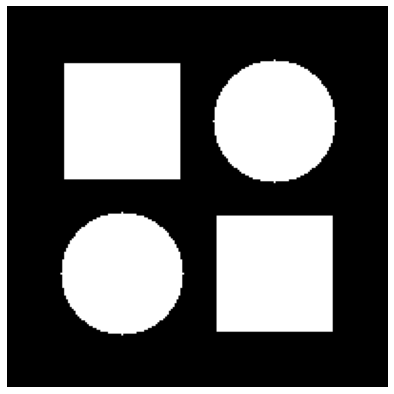

In [7]:
print('Исходное изображение:')
show_image(img)

Зашумленное изображение:


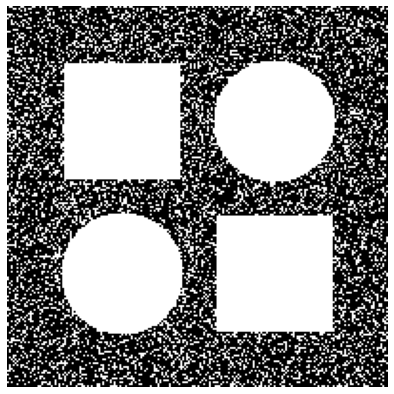

In [8]:
impulse_image = pulse_noise(img, PROBABILITY)
print('Зашумленное изображение:')
show_image(impulse_image)

# Задание 3.

Написать функции реализации эрозии и дилатации 

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы 


In [9]:
def get_value(current_window, kernel):
    """Вспомогательная функция."""
    vals = []
    kernel_rows, kernel_cols = kernel.shape

    for i, j in np.ndindex((kernel_rows, kernel_cols)):
        if kernel[i, j] == 1:
            vals.append(current_window[i, j])

    return vals

In [10]:
def erosian(image, kernel):
    """Функция эрозии."""
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    temp_image = np.zeros(
        (image_rows + 2 * (kernel_rows // 2), image_cols + 2 * (kernel_cols // 2)))
    temp_image[
        (kernel_rows // 2): image_rows + 2 * (kernel_rows // 2) - (kernel_rows // 2),
        (kernel_cols // 2): image_cols + 2 * (kernel_cols // 2) - (kernel_cols // 2)
    ] = image
    output_image = image.copy()

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        current_window = temp_image[i: i + kernel_rows, j: j + kernel_cols]
        output_image[i, j] = np.min(get_value(current_window, kernel))

    clear_output()
    return output_image

In [11]:
def dilation(image, kernel):
    """Функция дилатации."""
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    temp_image = np.zeros(
        (image_rows + 2 * (kernel_rows // 2), image_cols + 2 * (kernel_cols // 2)))
    temp_image[
        (kernel_rows // 2): image_rows + 2 * (kernel_rows // 2) - (kernel_rows // 2),
        (kernel_cols // 2): image_cols + 2 * (kernel_cols // 2) - (kernel_cols // 2)
    ] = image
    output_image = image.copy()

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        current_window = temp_image[i: i + kernel_rows, j: j + kernel_cols]
        output_image[i, j] = np.max(get_value(current_window, kernel))

    clear_output()
    return output_image

# Задание 4.

Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.

Исходное изображение:


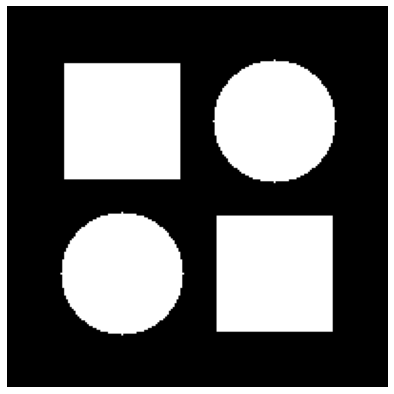

In [12]:
print('Исходное изображение:')
show_image(img)

Зашумленное изображение:


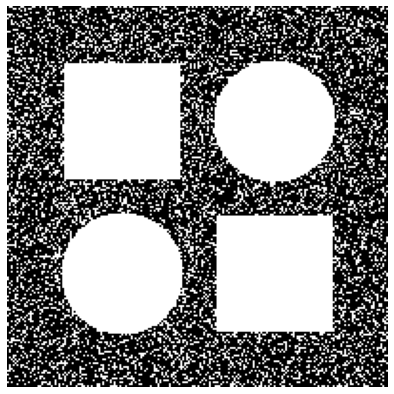

In [13]:
print('Зашумленное изображение:')
show_image(impulse_image)

Изображение после операции эрозии:


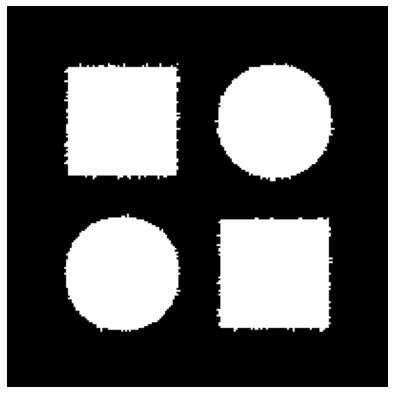

In [14]:
erosian_image = erosian(impulse_image, MORPH_CROSS_5x5)
print('Изображение после операции эрозии:')
show_image(erosian_image)

Изображение после операции дилатации:


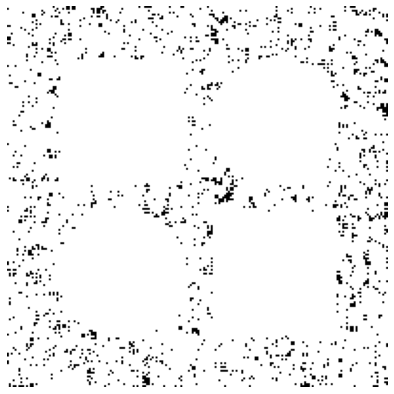

In [15]:
dilation_image = dilation(impulse_image, MORPH_CROSS_5x5)
print('Изображение после операции дилатации:')
show_image(dilation_image)

# Задание 5.

Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

In [16]:
def opening(image, kernel):
    """Функция вскрытия."""
    return dilation(erosian(image, kernel), kernel)

In [17]:
def closing(image, kernel):
    """Функция закрытия."""
    return erosian(dilation(image, kernel), kernel)

In [18]:
def noise_factor(image1, image2):
    """Функция подсчета коэффициента шума."""
    return (np.sum(image1 != image2)/(image1.shape[0] * image1.shape[1])) * 100

Исходное изображение:
Коэффициент шума: 0.0%


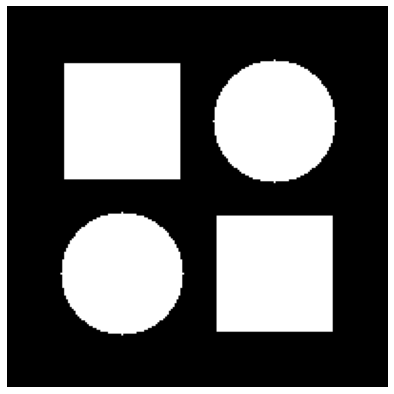

In [19]:
print('Исходное изображение:')
show_image(img)
print(f'Коэффициент шума: {noise_factor(img, img)}%')

Зашумленное изображение:
Коэффициент шума: 16.215%


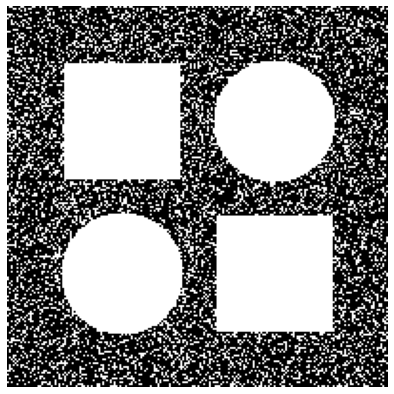

In [20]:
print('Зашумленное изображение:')
show_image(impulse_image)
print(f'Коэффициент шума: {noise_factor(img, impulse_image)}%')

Изображение после операции вскрытия:
Коэффициент зашумленности: 0.6224999999999999%


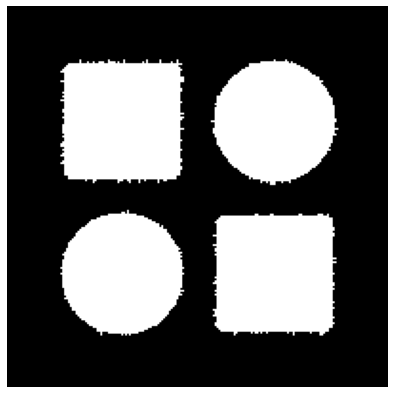

In [21]:
opening_image = opening(impulse_image, MORPH_CROSS_5x5)
print('Изображение после операции вскрытия:')
show_image(opening_image)
print(f'Коэффициент зашумленности: {noise_factor(img, opening_image)}%')

Изображение после операции закрытия:
Коэффициент зашумленности: 37.91%


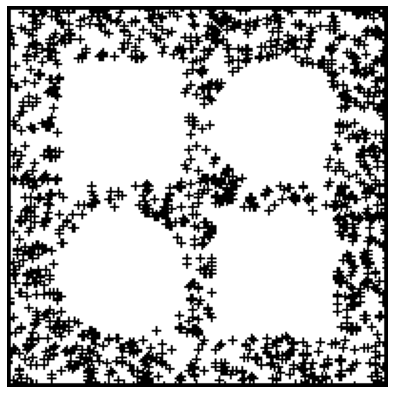

In [22]:
closed_image = closing(impulse_image, MORPH_CROSS_5x5)
print('Изображение после операции закрытия:')
show_image(closed_image)
print(f'Коэффициент зашумленности: {noise_factor(img, closed_image)}%')

# Задание 6.

Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
  *   Таблица логического фильтра в лекции слайд 17.


Формула логического фильтра: $$y = x_0 \wedge (x_1 \vee  x_2 \vee x_3 \vee x_4 \vee x_5) \vee \vee \neg x_0 \wedge (x_1 \wedge  x_2 \wedge x_3 \wedge x_4 )$$

In [23]:
def value_for_logic_filter(image, i, j):
    """Вспомогательная функция, которая формирует значения для логического
    фильтра."""
    filter_value = image[i, j] and (image[i - 1, j] or image[i, j - 1] or image[i, j + 1] or image[i + 1, j]) \
        or (not image[i, j]) and (image[i - 1, j] and image[i, j - 1] and image[i, j + 1] and image[i + 1, j])
    return int(filter_value)

In [24]:
def logic_filter(image):
    """Функция логического фильтра."""
    image_rows, image_cols = image.shape
    output_image = np.copy(image)

    temp_image = np.zeros((image_rows + 2, image_cols + 2))
    temp_image[1: -1, 1: -1] = image
    temp_image = temp_image.astype(bool)

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        output_image[i, j] = value_for_logic_filter(temp_image, i, j)

    clear_output()
    return output_image

Исходное изображение:
Коэффициент шума: 0.0%


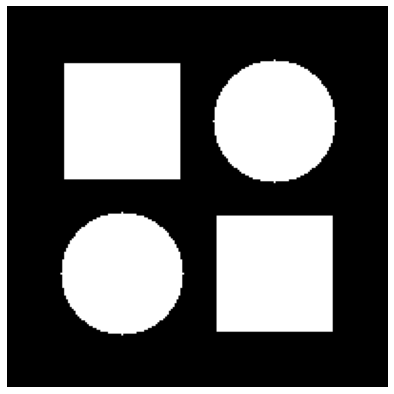

In [25]:
print('Исходное изображение:')
show_image(img)
print(f'Коэффициент шума: {noise_factor(img, img)}%')

Зашумленное изображение
Коэффициент зашумленности: 16.215%


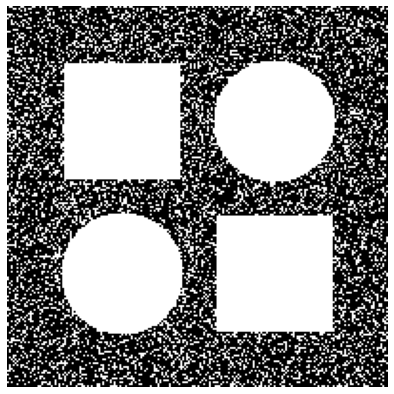

In [26]:
print('Зашумленное изображение')
show_image(impulse_image)
print(f'Коэффициент зашумленности: {noise_factor(img, impulse_image)}%')

Коэффициент зашумленности: 46.692499999999995%


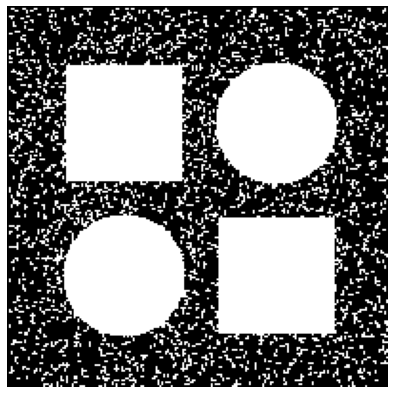

In [27]:
print('Изображение после обработки логическим фильтром')
logic_image = logic_filter(impulse_image)
show_image(logic_image)
print(f'Коэффициент зашумленности: {noise_factor(img, logic_image)}%')

# Задание 7.

На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными контурами.

Исходное изображение:


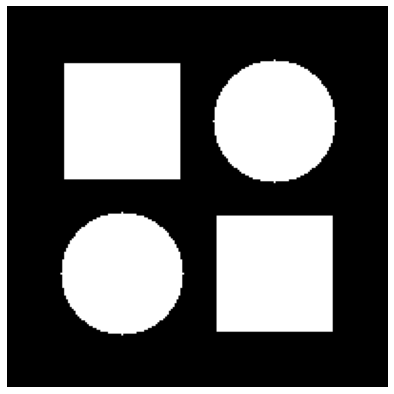

In [28]:
print('Исходное изображение:')
show_image(img)

Внешний контур:


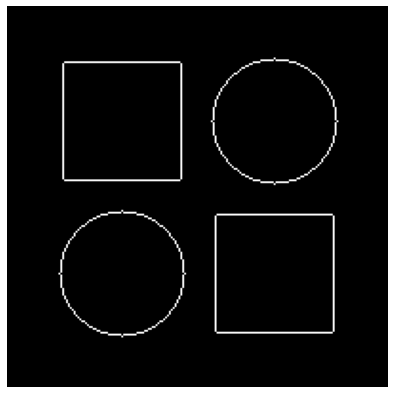

In [29]:
element = np.array([
    [False, True, False],
    [True,  True, True],
    [False, True, False]
])

show_image((img ^ dilation(img, element)))
print('Внешний контур:')

Внутренний контур:


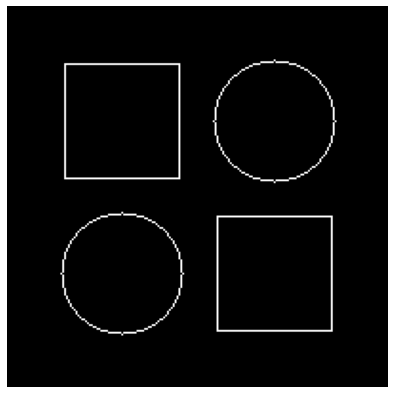

In [30]:
element = np.array([
    [False, True, False],
    [True,  True, True],
    [False, True, False]
])

show_image((img ^ erosian(img, element)))
print('Внутренний контур:')

Четырехсвязный внутренний контур:


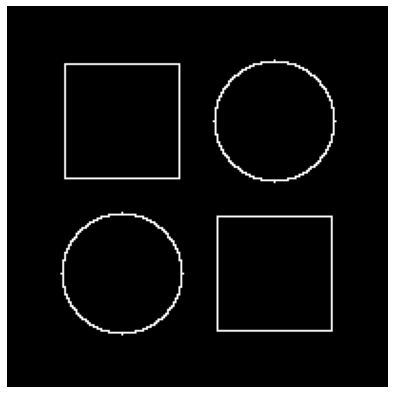

In [31]:
element = np.array([
    [True, True, True],
    [True, True, True],
    [True, True, True],
])

show_image((img ^ erosian(img, element)))
print('Четырехсвязный внутренний контур:')

Восьмисвязный внутренний контур:


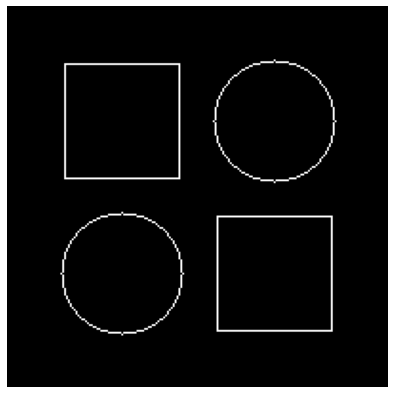

In [32]:
element = np.array([
    [False, True, False],
    [True,  True, True],
    [False, True, False]
])

show_image((img ^ erosian(img, element)))
print('Восьмисвязный внутренний контур:')

# Задание 8.

На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта. 
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

Исходное изображение:


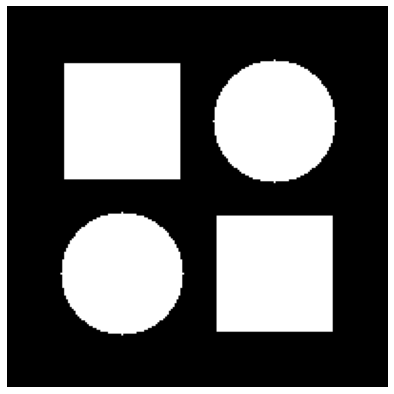

In [33]:
print('Исходное изображение:')
show_image(img)

Горизонтальные контуры изображения:


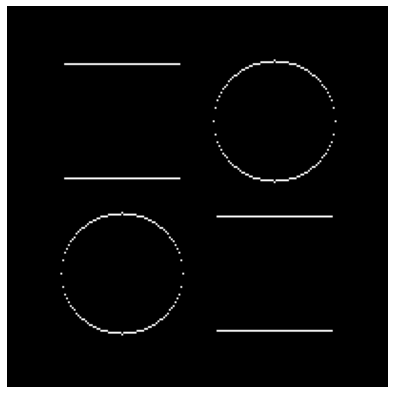

In [34]:
struct_element = np.array([
    [True], 
    [True], 
    [True]
])
show_image((img ^ erosian(img, struct_element)))
print('Горизонтальные контуры изображения:')

Вертикальные контуры изображения:


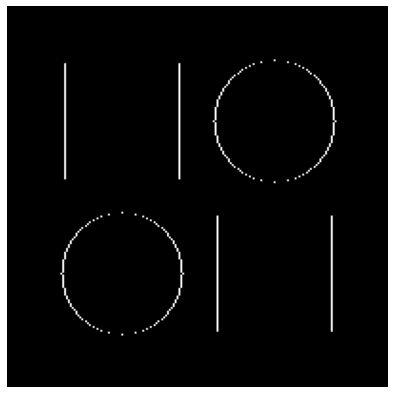

In [35]:
struct_element = np.array([
    [True, True, True]
])
show_image((img ^ erosian(img, struct_element)))
print('Вертикальные контуры изображения:')